In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path_image="/content/drive/MyDrive/Colab Notebooks/Vision por computadora 1/white_patch/segmentacion.png"

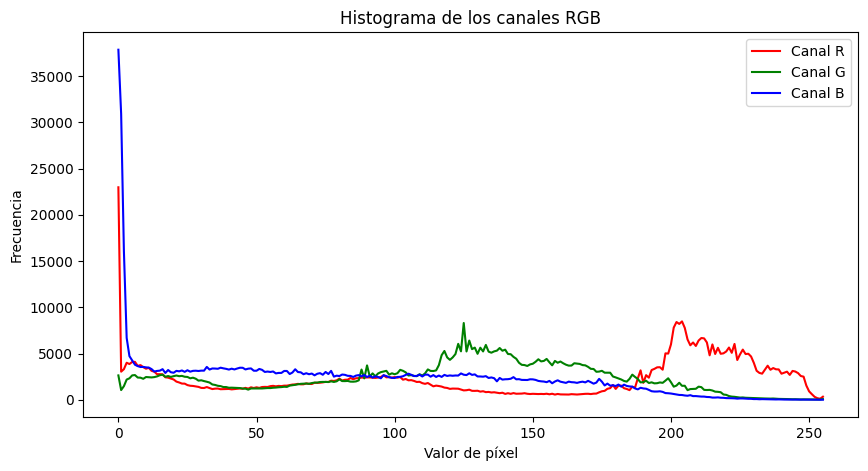

In [4]:
# Cargar la imagen
imagen = cv2.imread(path_image)

# Dividir la imagen en los canales RGB
r, g, b = cv2.split(imagen)

# Calcular los histogramas de cada canal
hist_r, bins_r = np.histogram(r.flatten(), bins=256, range=[0, 256])
hist_g, bins_g = np.histogram(g.flatten(), bins=256, range=[0, 256])
hist_b, bins_b = np.histogram(b.flatten(), bins=256, range=[0, 256])

# Graficar los histogramas de cada canal
plt.figure(figsize=(10, 5))
plt.plot(hist_r, color='red', label='Canal R')
plt.plot(hist_g, color='green', label='Canal G')
plt.plot(hist_b, color='blue', label='Canal B')
plt.xlabel('Valor de píxel')
plt.ylabel('Frecuencia')
plt.title('Histograma de los canales RGB')
plt.legend()
plt.show()


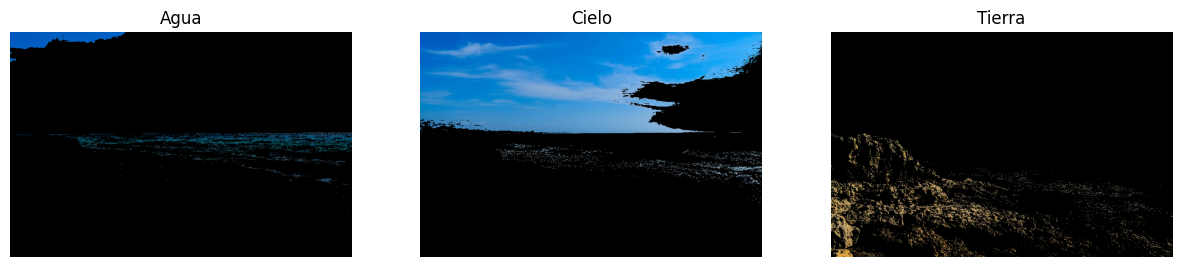

In [25]:

# Segmentar el agua, el cielo y la tierra utilizando máscaras
umbral_agua = 100
umbral_cielo = 130
umbral_tierra = 180

mascara_agua = (r  > umbral_agua) & (g < umbral_agua) & (b < umbral_agua)
mascara_tierra = (r < umbral_cielo) & (g > umbral_cielo) & (b > umbral_cielo)
mascara_cielo = (r > umbral_tierra) & (g < umbral_tierra) & (b < umbral_tierra)

# Aplicar las máscaras a la imagen original
resultado_agua = np.copy(imagen)
resultado_agua[~mascara_agua] = [0, 0, 0]  # Elementos que no cumplen la máscara se ponen en negro

resultado_cielo = np.copy(imagen)
resultado_cielo[~mascara_cielo] = [0, 0, 0]

resultado_tierra = np.copy(imagen)
resultado_tierra[~mascara_tierra] = [0, 0, 0]

# Mostrar las imágenes segmentadas
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(cv2.cvtColor(resultado_agua, cv2.COLOR_BGR2RGB))
axes[0].set_title('Agua')
axes[0].axis('off')
axes[1].imshow(cv2.cvtColor(resultado_cielo, cv2.COLOR_BGR2RGB))
axes[1].set_title('Cielo')
axes[1].axis('off')
axes[2].imshow(cv2.cvtColor(resultado_tierra, cv2.COLOR_BGR2RGB))
axes[2].set_title('Tierra')
axes[2].axis('off')
plt.show()